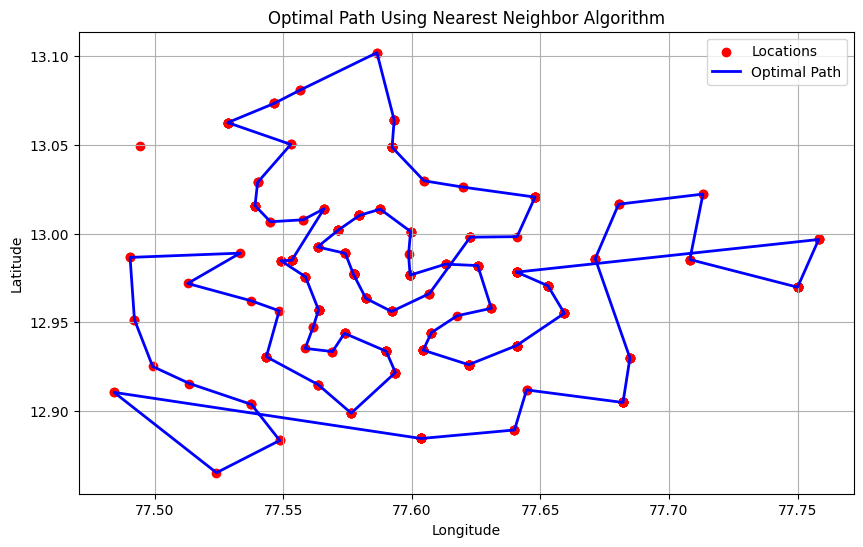

In [2]:
#Below is an example of a simple heuristic algorithm to solve the Traveling Salesman Problem (TSP) using the
#Nearest Neighbor algorithm in Python:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Load latitude and longitude data from a CSV file
df = pd.read_csv('customerdata (3).csv')

# Convert latitude and longitude columns to NumPy arrays
latitude = df['latitude'].values
longitude = df['longitude'].values

# Function to calculate Haversine distance between two coordinates
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

# Calculate the distance matrix using Haversine distance
n = len(latitude)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = haversine(latitude[i], longitude[i], latitude[j], longitude[j])

# Nearest Neighbor Algorithm with multiple starting points
def nearest_neighbor(distance_matrix, start_city):
    n = distance_matrix.shape[0]
    visited = [False] * n
    path = [start_city]

    for _ in range(n - 1):
        current_city = path[-1]
        nearest_city = None
        min_distance = float('inf')

        for city in range(n):
            if not visited[city] and distance_matrix[current_city][city] < min_distance:
                nearest_city = city
                min_distance = distance_matrix[current_city][city]

        path.append(nearest_city)
        visited[nearest_city] = True

    return path

# Find the optimal path using Nearest Neighbor with multiple starting points
best_path = None
best_distance = float('inf')
all_paths = []

for start_city in range(n):
    path = nearest_neighbor(distance_matrix, start_city)
    total_distance = sum(distance_matrix[path[i]][path[i + 1]] for i in range(n - 1))
    total_distance += distance_matrix[path[-1]][path[0]]  # Add distance from last to first city to close the loop

    all_paths.append((path, total_distance))

# Select the path with the shortest total distance
best_path, best_distance = min(all_paths, key=lambda x: x[1])

# Visualize the optimal path
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='red', marker='o', label='Locations')

# Plot the optimal path as a line
optimal_path_coordinates = [(longitude[i], latitude[i]) for i in best_path]
optimal_path_coordinates.append(optimal_path_coordinates[0])  # Close the loop
path_lon, path_lat = zip(*optimal_path_coordinates)
plt.plot(path_lon, path_lat, linestyle='-', linewidth=2, markersize=5, label='Optimal Path', color='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Optimal Path Using Nearest Neighbor Algorithm')
plt.grid(True)
plt.show()